In [116]:
# importing libraries
# import tensorflow 
# import keras  
import os
import glob 
# from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  

import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow
# import matplotlib.pyplot as plt

%matplotlib inline

In [117]:
# importing the images
# loading the image as a grayscale image
img0C = cv2.imread('testImages/C3.PNG')  # '/content/drive/MyDrive/Colab Notebooks/CO543/PROJECT/inputImages/H1.PNG'
img1C = cv2.imread('testImages/H2.PNG')
img2C = cv2.imread('testImages/H3.PNG')

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
# ax1.set_title('Image 0')
# ax1.imshow(img0C, cmap='jet')
# ax2.set_title('Image 1')
# ax2.imshow(img1C, cmap='jet')
# ax3.set_title('Image 2')
# ax3.imshow(img2C, cmap='jet')
# print(img0C.shape)
# print(img1C.shape)
# print(img2C.shape)



Converting the images to gray scale

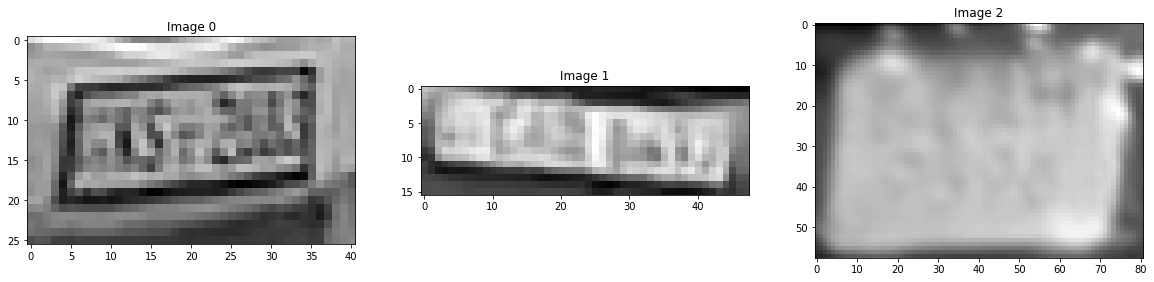

In [118]:
img0G = cv2.cvtColor(img0C, cv2.COLOR_BGR2GRAY)
img1G = cv2.cvtColor(img1C, cv2.COLOR_BGR2GRAY)
img2G = cv2.cvtColor(img2C, cv2.COLOR_BGR2GRAY)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.set_title('Image 0')
ax1.imshow(img0G, cmap='gray')
ax2.set_title('Image 1')
ax2.imshow(img1G, cmap='gray')
ax3.set_title('Image 2')
ax3.imshow(img2G, cmap='gray')

# Working with *img0G*

## Spatial domain processing

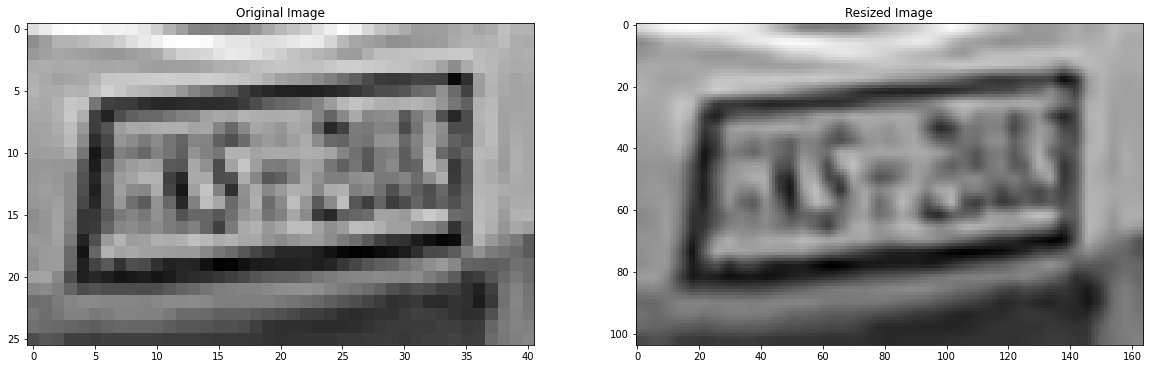

In [119]:
# Resized image
img0G_resized = cv2.resize(img0G,dsize=None,fx=4,fy=4)
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original Image')
ax1.imshow(img0G, cmap='gray')
ax2.set_title('Resized Image')
ax2.imshow(img0G_resized, cmap='gray')

In [120]:
############################################
img0G = img0G_resized


### Observing the histograms of the image

In [121]:
# function to display gray image and histogram
def display_gr(img, histName):

  channels = [0]
  bins =[256]
  mask = None
  r =[0,256]

  #grayscale histogram
  hist = cv2.calcHist([img], channels,mask, bins,r)

  fig = plt.figure(figsize = (20,20))

  #display original image
  original = plt.subplot2grid(shape=(3, 8), loc=(0, 0), colspan=3)
  
  original.imshow(img, cmap='gray', vmin=0, vmax=255)
  
  original.set_title('Input')

  #Display the grayscale histogram
  histogram = plt.subplot2grid(shape=(3, 8), loc=(0, 4), colspan=5)
  histogram.set_title(histName)
  histogram.set_xlabel("Bins")
  histogram.set_ylabel("# of Pixels")
  histogram.plot(hist)
  histogram.set_xlim([0, 256])

  # save the plot
  # plt.savefig('/content/drive/MyDrive/Colab Notebooks/CO543/lab02/task06_images/'+histName+'.png') 
  #show the plot
  plt.show()

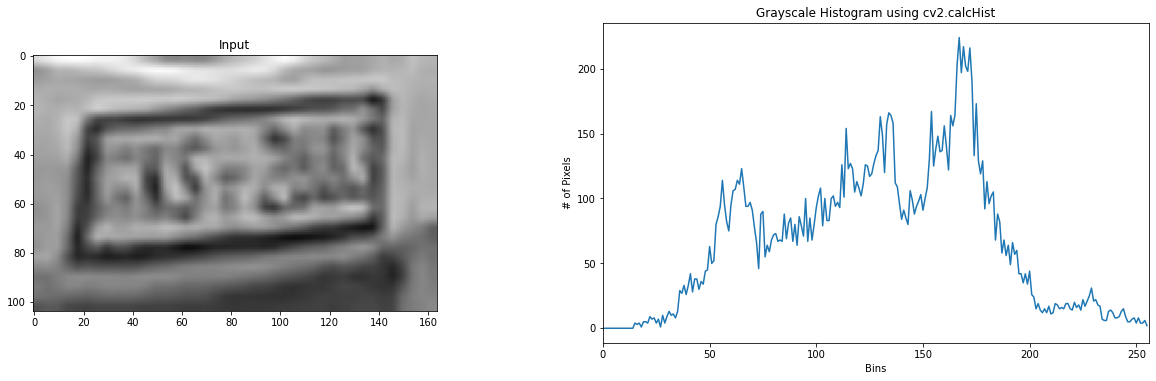

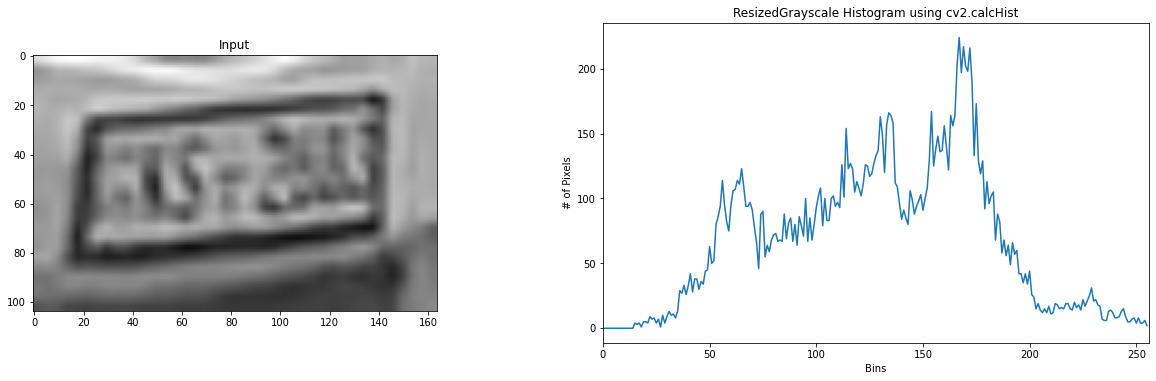

In [122]:
# display grayscale image histogram
display_gr(img0G, 'Grayscale Histogram using cv2.calcHist')
display_gr(img0G_resized, 'ResizedGrayscale Histogram using cv2.calcHist')


In [123]:
# function to display the original and the histogram equilized images along with there histograms
#title = title of the graph
def display_hist_equalize(img,title):
    channels = [0]
    bins =[256]
    mask = None
    r =[0,256]

    #original histogram
    o_hist= cv2.calcHist([img], channels,mask, bins,r)
    
    #equalized image
    equalized = cv2.equalizeHist(img)
    #histogram of the equalized image   
    e_hist = cv2.calcHist([equalized], channels,mask, bins,r)
    
    #plot the images    
    fig = plt.figure(figsize = (20,10))
    
    fig.suptitle(title)
    plot_size = (2,8)

    #display original image
    original = plt.subplot2grid(shape=plot_size, loc=(0, 0), colspan=3, rowspan = 1)
    original.imshow(img, cmap='gray', vmin=0, vmax=255)
    original.set_title('Original')

    #Display the grayscale histogram for original
    histogram = plt.subplot2grid(shape=plot_size, loc=(0, 4), colspan=5, rowspan = 1)
    histogram.set_title("Histogram for Original")
    histogram.set_xlabel("Bins")
    histogram.set_ylabel("# of Pixels")
    histogram.plot(o_hist)
    histogram.set_xlim([0, 256])
    
    #display equalized image
    equ = plt.subplot2grid(shape=plot_size, loc=(1, 0), colspan=3, rowspan = 1)
    equ.imshow(equalized, cmap='gray', vmin=0, vmax=255)
    equ.set_title('Equalized')
    
    #Display the grayscale histogram for original
    e_histo = plt.subplot2grid(shape=plot_size, loc=(1, 4), colspan=5, rowspan = 1)
    e_histo.set_title("Histogram for Equalized")
    e_histo.set_xlabel("Bins")
    e_histo.set_ylabel("# of Pixels")
    e_histo.plot(e_hist)
    e_histo.set_xlim([0, 256])
    

    #show the plot
    plt.show()
   
    return equalized

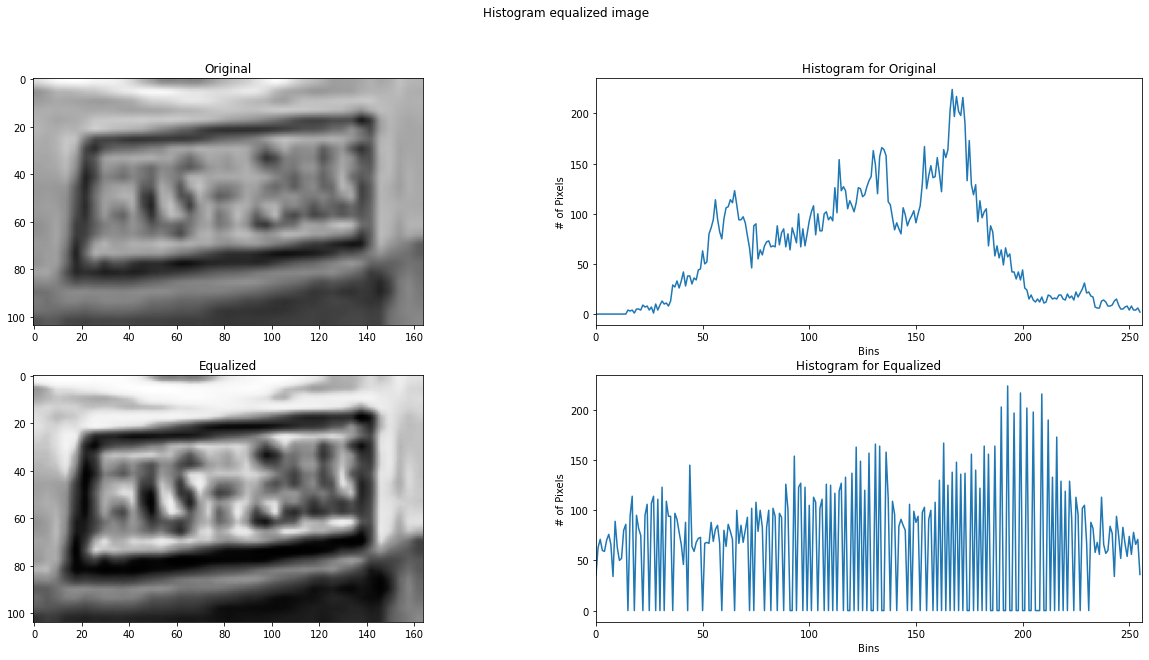

In [124]:
img0G_histEq = display_hist_equalize(img0G,'Histogram equalized image')
# img0G_histEq = display_hist_equalize(img0G_resized,'Histogram equalized resized image')



### Image thresholding - DID NOT WORK

In [125]:
# function to perfomr the image thresholding
# in_img = an grayscale image read using cv2.imread()
# thresh_val = the threshold value such that 0 < thresh_val <= 255
def threshold(in_img, thresh_val1, thresh_val2):
  rows, cols = in_img.shape[:2]  # getting the height(number of rows) and the width(number of columns) of the original image

  out_img = np.zeros([rows, cols])
  for r in range(rows):
    for c in range(cols):
      if in_img[r, c] > thresh_val1 and in_img[r, c] < thresh_val2:
        out_img[r, c] = np.uint8(0) 
      else:
        out_img[r, c] = np.uint8(255) 

  return out_img

In [126]:
# function to display the original and the transformed images
def display_images(original_img, trans_img, trans_name):
  fig = plt.figure(figsize = (15, 15))

  # for the original image
  fig.add_subplot(1, 2, 1)
  plt.imshow(original_img, cmap="gray")  # cv2.cvtColor(original_img1, cv2.COLOR_BGR2RGB)
  plt.title('Original image')

  # for the transformed image
  fig.add_subplot(1, 2, 2)
  plt.imshow(trans_img, cmap="gray")
  plt.title(trans_name)
  
  # to save the images
  # plt.savefig('/content/drive/MyDrive/Colab Notebooks/CO543/lab02/task01_images/'+trans_name+'.png') 
  plt.show()

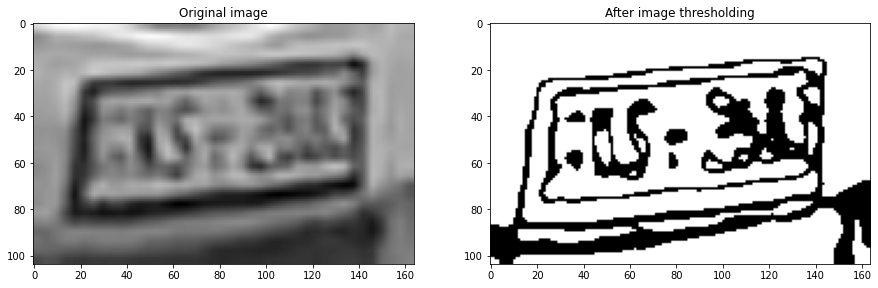

In [127]:
t1 = 85 #@param {type:"slider", min:0, max:255, step:1 }
t2 = 130 #@param {type:"slider", min:0, max:255, step:1 }

isHistEqed = False #@param {type:"boolean"}

if isHistEqed:
  inImg = img0G_histEq
else:
  inImg = img0G
# calling the function to threshold
thresh_img = threshold(inImg, t1, t2)
# cv2_imshow(thresh_img)
display_images(inImg, thresh_img, 'After image thresholding')

### Bit plane slicing - DID NOT WORK

In [128]:
# function to display the original and the transformed images
def display_images(original_img, trans_img, trans_name):
  fig = plt.figure(figsize = (15, 15))

  # for the original image
  fig.add_subplot(1, 2, 1)
  plt.imshow(original_img, cmap="gray")  # cv2.cvtColor(original_img1, cv2.COLOR_BGR2RGB)
  plt.title('Original image')

  # for the transformed image
  fig.add_subplot(1, 2, 2)
  plt.imshow(trans_img, cmap="gray")
  plt.title(trans_name)
  
  # to save the images
  # plt.savefig('/content/drive/MyDrive/Colab Notebooks/CO543/lab02/task03_images/'+trans_name+'.png') 
  plt.show()


In [129]:
# function to bit plane slice AND display/save figure
# img = input image
# has no return value
def bit_plane(img,plane):
  #in each pixel's intensity,get the value of the bit in position given by plane variable 
 
  return np.array((img>>plane & 1))

For the original gray scale image

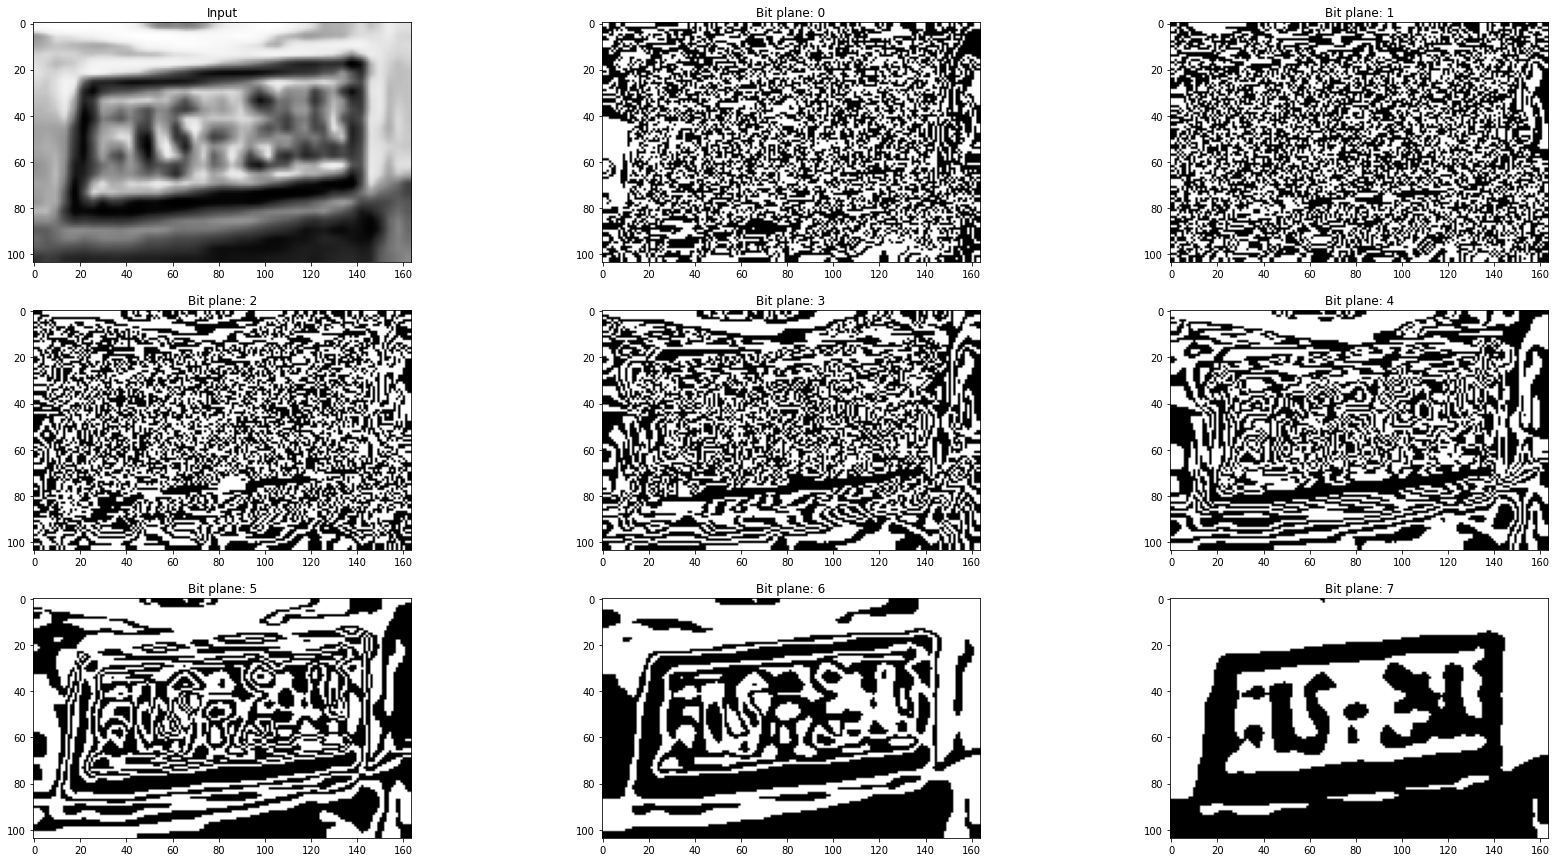

In [130]:
isHistEqed = True #@param {type:"boolean"}

if isHistEqed:
  inImg = img0G_histEq
else:
  inImg = img0G

figShape = (3,9)
fig = plt.figure(figsize = (30,15))

# nested loop to plot the bit plane images
for i in range(3):
  for j in range(3):
    if i == 0 and j == 0:
      #display original image
      original = plt.subplot2grid(shape=figShape, loc=(0, 0), colspan=3, rowspan = 1)
      original.imshow(inImg, cmap='gray', vmin=0, vmax=255)
      original.set_title('Input')
    
    else:
      plane= bit_plane(inImg,3*i+j-1)

      planeij = plt.subplot2grid(shape=figShape, loc=(i, j*3), colspan=3, rowspan = 1)
      planeij.imshow(plane,cmap ='gray')
      planeNo = 3*i+j-1
      planeij.set_title(f'Bit plane: '+str(planeNo))

plt.show()

For the histogram equalized gray scale image

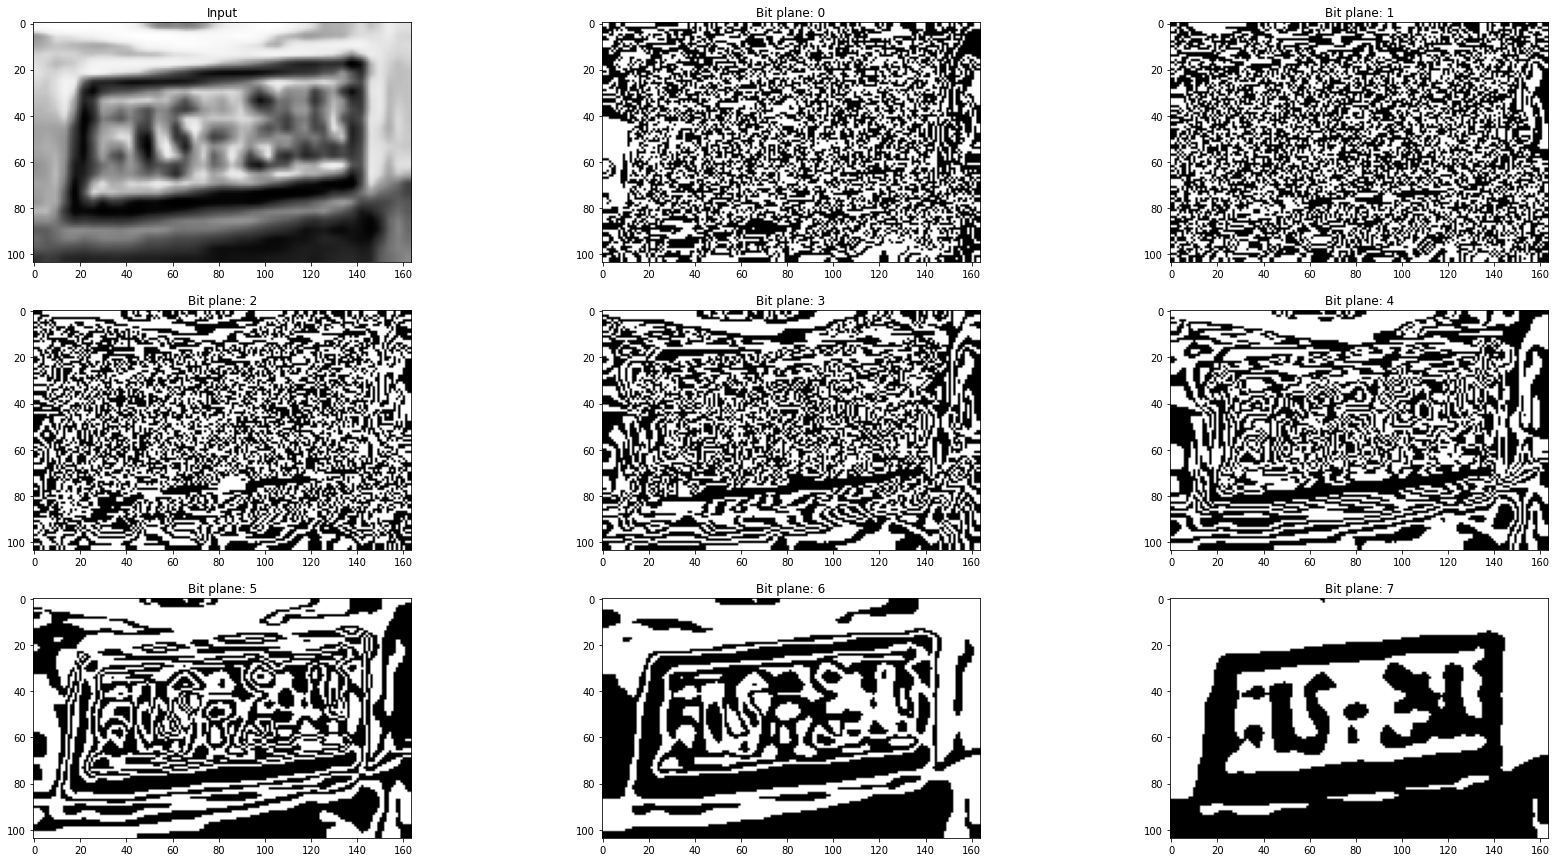

In [131]:

figShape = (3,9)
fig = plt.figure(figsize = (30,15))

# nested loop to plot the bit plane images
for i in range(3):
  for j in range(3):
    if i == 0 and j == 0:
      #display original image
      original = plt.subplot2grid(shape=figShape, loc=(0, 0), colspan=3, rowspan = 1)
      original.imshow(img0G_histEq, cmap='gray', vmin=0, vmax=255)
      original.set_title('Input')
    
    else:
      plane= bit_plane(img0G_histEq,3*i+j-1)

      planeij = plt.subplot2grid(shape=figShape, loc=(i, j*3), colspan=3, rowspan = 1)
      planeij.imshow(plane,cmap ='gray')
      planeNo = 3*i+j-1
      planeij.set_title(f'Bit plane: '+str(planeNo))

plt.show()

### Power transformation

In [132]:
# function to perfomr the image power intensity transformation
# in_img = an grayscale image read using cv2.imread()
# gamma = gamma value for the transformation
def power_intensity_transform(in_img, gamma):
  rows, cols = in_img.shape[:2]  # getting the height(number of rows) and the width(number of columns) of the original image

  # calculating the constant
  c = 255 / (255 ** gamma)  # 255 ** gamma is the maximum value you can get without the constant
  # Apply gamma correction.
  gamma_corrected = np.array(c*(in_img ** gamma), dtype = 'uint8')
  
  return gamma_corrected

For the original image

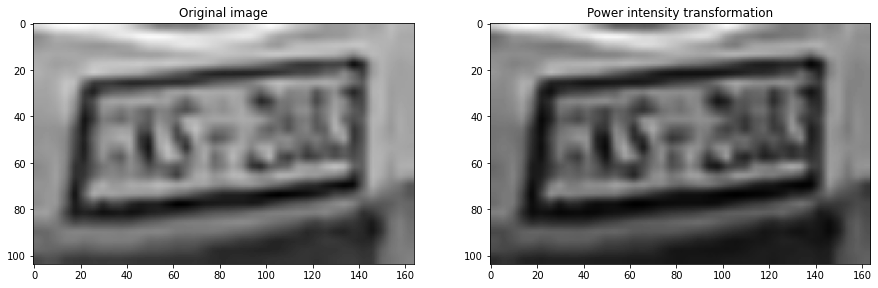

In [133]:
isHistEqed = False #@param {type:"boolean"}

if isHistEqed:
  inImg = img0G_histEq
else:
  inImg = img0G

# calling the function
gamma_img = power_intensity_transform(inImg, 1.5)
display_images(inImg, gamma_img, 'Power intensity transformation')

For the histogram equalized image

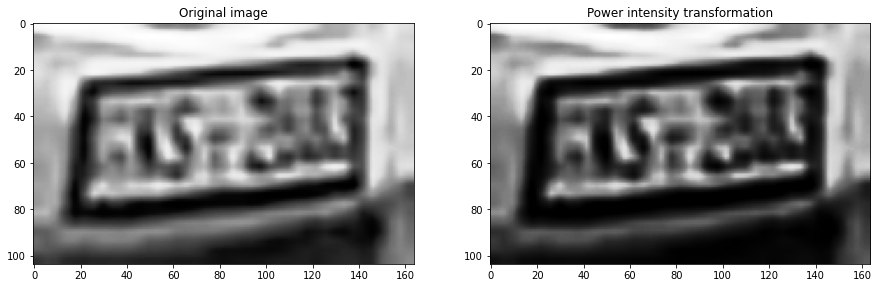

In [134]:

# calling the function
gamma_img = power_intensity_transform(img0G_histEq, 1.7)
display_images(img0G_histEq, gamma_img, 'Power intensity transformation')

### Constrast Stretching

In [135]:
# Function to map each intensity level to output intensity level for a single pixel
# pix = value of each pixel in the input image
# r1, s1 = coordinates of the first breakpoint | r2, s2 = coordinates of the second breakpoint
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):  # if the pixel is in region 1
        return (s1 / r1)*pix  # returning the scaled value

    elif (r1 < pix and pix <= r2):  # if the pixel is in the region 2
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1  # returning the scaled value
    else:  # if the pixel is in the region 2
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2  # returning the scaled value

# vectorizing the the above function so that it will apply to all the pixel in an image
contrastStretch = np.vectorize(pixelVal)

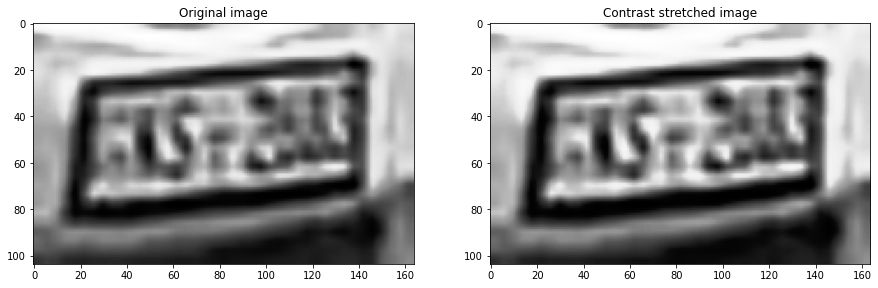

In [136]:
isHistEqed = True #@param {type:"boolean"}

if isHistEqed:
  inImg = img0G_histEq
else:
  inImg = img0G


# calling the function
r1 = 19 #@param {type:"slider", min:0, max:255, step:1 }
s1 = 10 #@param {type:"slider", min:0, max:255, step:1 }
r2 = 211 #@param {type:"slider", min:0, max:255, step:1 }
s2 = 230 #@param {type:"slider", min:0, max:255, step:1 }
contrastStretched_img = contrastStretch(inImg, r1, s1, r2, s2)
display_images(inImg, contrastStretched_img, 'Contrast stretched image')   # img0G_histEq

### Gray level slicing

In [137]:
# Function to map each intensity level to output intensity level for a single pixel
# pix = value of each pixel in the input image
# t1, t2 = upper and lower thresholds of the chosen region
def pixelValGLS(pix, t1, t2):
  if t1 < pix < t2: 
    return 0  # returning 255 if inside the considered region
  else:
    return pix  # return the same value if not inside the region  

# vectorizing the the above function so that it will apply to all the pixel in an image
grayLevelSlicing = np.vectorize(pixelValGLS)

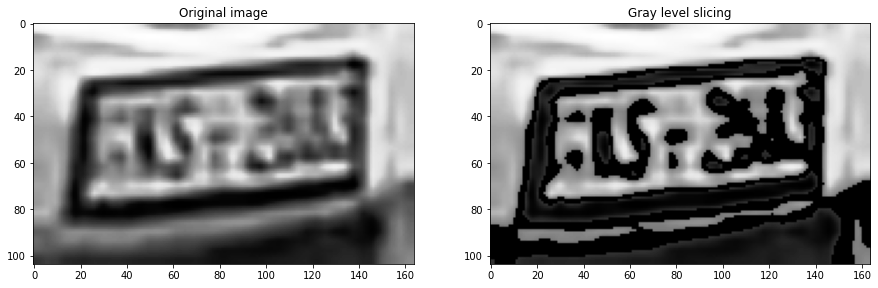

In [142]:
isHistEqed = True #@param {type:"boolean"}

if isHistEqed:
  inImg = img0G_histEq
else:
  inImg = img0G

# calling the above function
t1 = 50 #@param {type:"slider", min:0, max:255, step:1 }
t2 = 121 #@param {type:"slider", min:0, max:255, step:1 }
gray_level_sliced_img = grayLevelSlicing(inImg, t1, t2)

display_images(inImg, gray_level_sliced_img, 'Gray level slicing')

## Fourier Domain processing

In [139]:
def dispF(orImg, transImg):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
  ax1.set_title('Original Image')
  ax1.imshow(orImg, cmap='gray')
  ax2.set_title('Image in the Fourier Domain')
  ax2.imshow(20 * np.log(transImg), cmap='gray')  




# ax2.imshow(20 * np.log(magnitude_spectrum), cmap='gray')


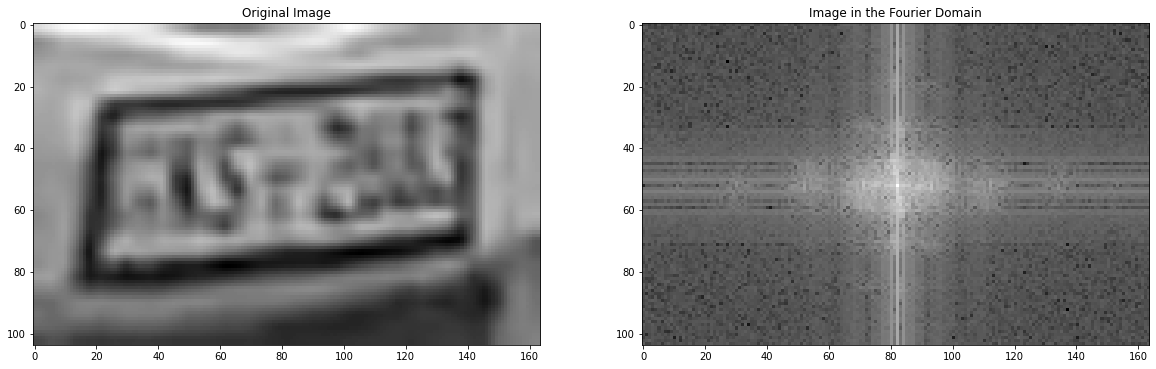

In [140]:
isHistEqed = False #@param {type:"boolean"}

if isHistEqed:
  inImg = img0G_histEq
else:
  inImg = img0G

# function to get the fourier transform of an image

def getFT(img):
    isShifted = True #@param {type:"boolean"}
    isAbs = True #@param {type:"boolean"}

    img_f = np.fft.fft2(img)
    if isShifted:
      img_f = np.fft.fftshift(img_f)
    if isAbs:
      img_f = np.abs(img_f)

    return img_f

img0G_ft = getFT(inImg)
dispF(inImg, img0G_ft)

### Gaussian blur - DID NOT WORK

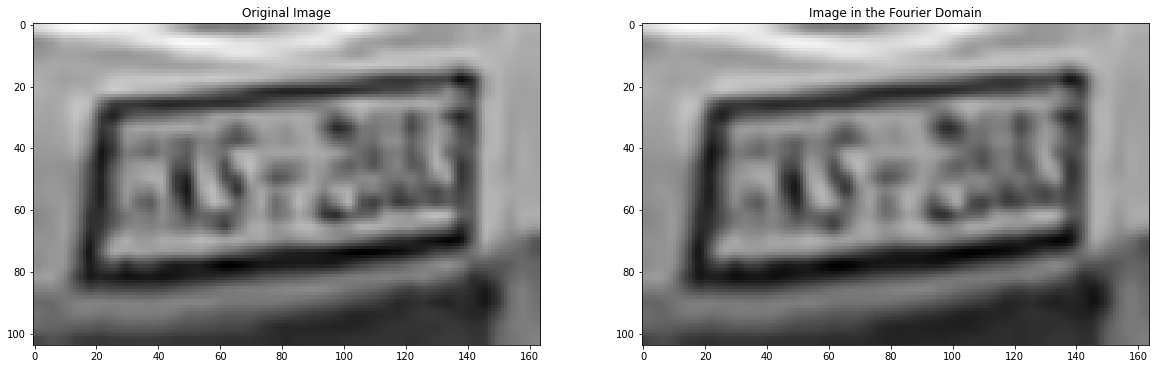

In [141]:
# img0G_resized = cv2.resize(img0G, (50, 50), interpolation = cv2.INTER_AREA)
img0G_GaussBlur = cv2.GaussianBlur(img0G,(3,3),cv2.BORDER_DEFAULT)
# dispF(img0G, img0G_resized)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original Image')
ax1.imshow(img0G, cmap='gray')
ax2.set_title('Image in the Fourier Domain')
ax2.imshow(img0G_GaussBlur, cmap='gray') 